<a href="https://colab.research.google.com/github/razzlestorm/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module4-makefeatures/Jerimiah_Willhite_LS_DS_124_Make_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Make features

Objectives
-  understand the purpose of feature engineering
-  work with strings in pandas
- work with dates and times in pandas

Links
- [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)
- Python Data Science Handbook
  - [Chapter 3.10](https://jakevdp.github.io/PythonDataScienceHandbook/03.10-working-with-strings.html), Vectorized String Operations
  - [Chapter 3.11](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html), Working with Time Series

## Get LendingClub data

[Source](https://www.lendingclub.com/info/download-data.action)

In [1]:
!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

--2019-07-19 03:48:14--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 64.48.1.20
Connecting to resources.lendingclub.com (resources.lendingclub.com)|64.48.1.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip’

LoanStats_2018Q4.cs     [                <=> ]  21.51M   911KB/s    in 24s     

2019-07-19 03:48:39 (905 KB/s) - ‘LoanStats_2018Q4.csv.zip’ saved [22559146]



In [2]:
!unzip LoanStats_2018Q4.csv.zip

Archive:  LoanStats_2018Q4.csv.zip
  inflating: LoanStats_2018Q4.csv    


In [3]:
!head LoanStats_2018Q4.csv

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med","mths_since_last_major_derog","policy_code","application_type","annual_inc_joint","dti_joint","verification_status_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal","open_acc_6m","open_act_il","op

## Load LendingClub data

pandas documentation
- [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)
- [`options.display`](https://pandas.pydata.org/pandas-docs/stable/options.html#available-options)

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('LoanStats_2018Q4.csv', skiprows=1, skipfooter=2, engine='python')
print(df.shape)
df.head(15)

(128412, 144)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,5000,5000,5000.0,36 months,17.97%,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,490xx,MI,10.51,0,Apr-2011,0,NaN,NaN,8,0,4599,19.1%,13,w,4456.17,4456.17,895.960000,895.96,543.83,352.13,0.0,0.0,0.0,Jun-2019,180.69,Jul-2019,Jun-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,110299,0,1,0,2,14.0,7150,72.0,0,2,0,35.0,24100,1,5,0,4,18383.0,13800.0,0.0,0,0,87.0,92,15,14,2,77.0,NaN,14.0,NaN,0,0,3,3,3,4,6,7,3,8,0.0,0,0,0,100.0,0.0,0,0,136927,11749,13800,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,25000,25000,25000.0,60 months,14.47%,587.82,C,C2,teacher,10+ years,OWN,110000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,117xx,NY,26.43,1,Jan-1997,0,7.0,NaN,23,0,39053,45.7%,49,w,23533.24,23533.24,2908.950000,2908.95,1466.76,1442.19,0.0,0.0,0.0,May-2019,587.82,Jul-2019,Jun-2019,0,7.0,1,Individual,NaN,NaN,NaN,0,0,95648,0,3,0,0,35.0,54716,23.0,1,2,8422,39.0,85500,0,1,0,2,4159.0,34837.0,44.5,0,0,263.0,246,10,10,0,48.0,NaN,NaN,NaN,0,9,13,10,14,21,19,27,13,23,0.0,0,1,1,98.0,10.0,0,0,179321,95648,62800,91424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,10000,10000,10000.0,36 months,10.33%,324.23,B,B1,NaN,< 1 year,MORTGAGE,280000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,974xx,OR,6.15,2,Jan-1996,0,18.0,NaN,14,0,9082,38%,23,w,8788.59,8788.59,1612.540000,1612.54,1211.41,401.13,0.0,0.0,0.0,May-2019,324.23,Jul-2019,Jun-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,671,246828

In [5]:
pd.options.display.max_columns = 150
pd.options.display.max_rows = 150
df.head().T

,0,1,2,3,4
id,NaN,NaN,NaN,NaN,NaN
member_id,NaN,NaN,NaN,NaN,NaN
loan_amnt,5000,25000,10000,4000,31450
funded_amnt,5000,25000,10000,4000,31450
funded_amnt_inv,5000,25000,10000,4000,31450
term,36 months,60 months,36 months,36 months,36 months
int_rate,17.97%,14.47%,10.33%,23.40%,7.56%
installment,180.69,587.82,324.23,155.68,979.16
grade,D,C,B,E,A
sub_grade,D1,C2,B1,E1,A3


In [6]:
df.isna().sum()

id                                            128412
member_id                                     128412
loan_amnt                                          0
funded_amnt                                        0
funded_amnt_inv                                    0
term                                               0
int_rate                                           0
installment                                        0
grade                                              0
sub_grade                                          0
emp_title                                      20947
emp_length                                     11704
home_ownership                                     0
annual_inc                                         0
verification_status                                0
issue_d                                            0
loan_status                                        0
pymnt_plan                                         0
url                                           

In [7]:
df[df.loan_amnt.isna()]
#Total amount funded in policy code 1: 2050909275
#Total amount funded in policy code 2: 820109297


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term


In [8]:
df.info()
#36 objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128412 entries, 0 to 128411
Columns: 144 entries, id to settlement_term
dtypes: float64(57), int64(51), object(36)
memory usage: 141.1+ MB


In [9]:
df.describe()
#Ignores numerical values

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,url,desc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,0.0,128412.000000,128412.000000,128412.000000,128412.000000,1.284120e+05,0.0,0.0,128175.000000,128412.000000,128412.000000,56216.000000,15450.000000,128412.000000,128412.000000,1.284120e+05,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,29180.000000,128412.0,1.678200e+04,16782.000000,128412.0,128412.000000,1.284120e+05,128412.000000,128412.000000,128412.000000,128412.000000,123934.000000,1.284120e+05,108138.000000,128412.000000,128412.000000,128412.000000,128375.000000,1.284120e+05,128412.000000,128412.000000,128412.000000,128412.000000,128399.000000,126721.000000,126658.000000,128412.000000,128412.000000,123934.000000,128412.000000,128412.000000,128412.000000,128412.000000,126821.000000,25169.000000,112365.000000,36782.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,125553.0,128412.0,128412.000000,128412.000000,128412.000000,126720.000000,128412.000000,128412.0,1.284120e+05,1.284120e+05,128412.000000,1.284120e+05,1.678200e+04,16782.000000,16782.000000,16782.000000,16524.000000,16782.000000,16782.000000,16782.000000,16782.000000,5154.000000,1.0,1.00,1.0,1.0,1.00,1.00,1.00,38.000000,38.000000,38.000000
mean,NaN,NaN,15971.321021,15971.321021,15968.498166,463.255466,8.279733e+04,NaN,NaN,19.933178,0.227837,0.447038,36.880337,86.130162,11.564052,0.121850,1.689800e+04,22.677413,12743.283766,12741.217970,4157.679956,4156.775196,3103.920228,1052.696287,0.342933,0.720505,0.129691,1368.881270,0.017958,46.553461,1.0,1.335516e+05,19.226602,0.0,188.304286,1.467922e+05,0.939507,2.760202,0.689071,1.572665,20.201519,3.627228e+04,68.211757,1.195901,2.540783,6062.072275,54.298812,3.938218e+04,1.114561,1.519928,1.876912,4.382698,13828.378874,15357.302957,50.048701,0.007087,0.967768,123.056925,173.063623,15.431634,8.635400,1.323155,26.013957,40.415233,7.552832,37.817275,0.461553,3.659876,5.414128,4.882129,7.065944,8.288524,8.199210,12.866702,5.386342,11.546717,0.0,0.0,0.059488,2.011642,94.659843,32.900756,0.121733,0.0,1.884852e+05,5.356097e+04,27439.534163,4.682180e+04,3.664280e+04,0.585985,1.587177,11.4360

In [10]:
df.describe(include='object').T

,count,unique,top,freq
term,128412,2,36 months,88179
int_rate,128412,46,13.56%,6975
grade,128412,7,A,38011
sub_grade,128412,35,A4,9770
emp_title,107465,43892,Teacher,2090
emp_length,116708,11,10+ years,38826
home_ownership,128412,4,MORTGAGE,63490
verification_status,128412,3,Not Verified,58350
issue_d,128412,3,Oct-2018,46305
loan_status,128412,7,Current,114514


In [11]:
df['emp_length'].value_counts()

10+ years    38826
< 1 year     16036
2 years      10857
3 years      10038
1 year        9067
5 years       7737
4 years       7474
6 years       5422
7 years       4374
8 years       4104
9 years       2773
Name: emp_length, dtype: int64

## Work with strings

For machine learning, we usually want to replace strings with numbers.

We can get info about which columns have a datatype of "object" (strings)

### Convert `int_rate` another way?


In [12]:
df['int_rate'].str.rstrip('%').astype('float')


0         17.97
1         14.47
2         10.33
3         23.40
4          7.56
5         10.72
6         14.47
7         17.97
8         11.31
9         15.02
10        17.97
11        18.94
12         8.81
13        14.47
14        12.98
15        13.56
16        12.98
17        10.72
18        11.31
19        12.98
20        26.31
21        17.97
22        11.80
23        10.72
24        11.80
25        12.98
26        12.98
27        16.91
28        17.97
29        16.14
30        11.31
31        15.02
32        23.40
33        16.91
34        20.89
35        17.97
36        10.72
37        23.40
38        10.72
39        16.91
40        20.89
41        11.31
42        15.02
43        17.97
44        15.02
45        16.14
46        10.72
47        13.56
48        14.47
49        17.97
50        15.02
51        14.47
52        17.97
53        14.47
54        26.31
55        14.47
56        11.31
57        20.89
58        16.91
59        10.33
60        22.35
61        10.33
62      

### Convert `int_rate`

Define a function to remove percent signs from strings and convert to floats

In [0]:
x = '12.5%'

def remove_percent_sign(string):
    '''This removes a % from a string and then returns the interest rate as a float'''
    return float(string.strip('%'))

In [14]:
df['int_rate'] = df['int_rate'].apply(remove_percent_sign)
df['int_rate'].head()

0    17.97
1    14.47
2    10.33
3    23.40
4     7.56
Name: int_rate, dtype: float64

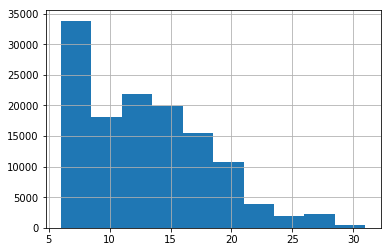

In [15]:
df['int_rate'].hist();

Apply the function to the `int_rate` column

### Clean `emp_title`

Look at top 20 titles

In [16]:
df['emp_title'].value_counts(dropna=False).head(30)

NaN                         20947
Teacher                      2090
Manager                      1773
Registered Nurse              952
Driver                        924
RN                            726
Supervisor                    697
Sales                         580
Project Manager               526
General Manager               523
Office Manager                521
Owner                         420
Director                      402
Operations Manager            387
Truck Driver                  387
Nurse                         326
Engineer                      325
Sales Manager                 304
manager                       301
Supervisor                    270
Administrative Assistant      269
Accountant                    268
Server                        265
Vice President                261
Mechanic                      258
Account Manager               254
Police Officer                252
teacher                       249
Technician                    248
Manager       

How often is `emp_title` null?

In [17]:
df['emp_title'].isna().sum() / len(df)       #or /df.shape[0] which is the number of rows

0.1631233841074043

Clean the title and handle missing values

In [18]:
import numpy as np
example = ['owner', 'Supervisor', ' Project manager', np.nan]

def clean_emp_title(string):
    if isinstance(string, str):
        #strips spaces and returns Title Case
        return string.strip().title()
    else:
        return 'Missing'
      
for x in example:
  print(clean_emp_title(x))
  
#this is the same as the for loop, but runs faster
[clean_emp_title(x) for x in example]

Owner
Supervisor
Project Manager
Missing


['Owner', 'Supervisor', 'Project Manager', 'Missing']

In [0]:
'''
-Capitalize
-Strip Spaces
-Replace NaNs with 'missing'
'''


df['emp_title'] = df['emp_title'].apply(clean_emp_title)

### Create `emp_title_manager`

pandas documentation: [`str.contains`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.contains.html)

In [20]:
df['emp_title'].value_counts().head(10)

Missing             20947
Teacher              2557
Manager              2395
Registered Nurse     1418
Driver               1258
Supervisor           1160
Truck Driver          920
Rn                    834
Office Manager        805
Sales                 803
Name: emp_title, dtype: int64

In [21]:
df['emp_title'].str.contains('manager')

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
30        False
31        False
32        False
33        False
34        False
35        False
36        False
37        False
38        False
39        False
40        False
41        False
42        False
43        False
44        False
45        False
46        False
47        False
48        False
49        False
50        False
51        False
52        False
53        False
54        False
55        False
56        False
57        False
58        False
59        False
60        False
61        False
62      

In [22]:
df['emp_title_manager'] = df['emp_title'].str.contains('Manager')
df['emp_title_manager'].value_counts()

False    110530
True      17882
Name: emp_title_manager, dtype: int64

In [23]:
df['int_rate'].groupby(df['emp_title_manager']).mean()

emp_title_manager
False    12.957349
True     12.760582
Name: int_rate, dtype: float64

## Work with dates

pandas documentation
- [to_datetime](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html)
- [Time/Date Components](https://pandas.pydata.org/pandas-docs/stable/timeseries.html#time-date-components) "You can access these properties via the `.dt` accessor"

In [24]:
df['issue_d'].describe()

count       128412
unique           3
top       Oct-2018
freq         46305
Name: issue_d, dtype: object

In [0]:
df['issue_d'] = pd.to_datetime(df['issue_d'], infer_datetime_format=True)

In [26]:
df['issue_d'].describe()

count                  128412
unique                      3
top       2018-10-01 00:00:00
freq                    46305
first     2018-10-01 00:00:00
last      2018-12-01 00:00:00
Name: issue_d, dtype: object

In [27]:
df['issue_d'].iloc[0:5].dt.year
#can use this to pull all data from certain time

0    2018
1    2018
2    2018
3    2018
4    2018
Name: issue_d, dtype: int64

In [0]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])

In [29]:
df['days_since_earliest_cr_line'] = (df['issue_d'] - df['earliest_cr_line']).dt.days
df['days_since_earliest_cr_line'].describe()

count    128412.000000
mean       5859.891490
std        2886.535578
min        1126.000000
25%        4049.000000
50%        5266.000000
75%        7244.000000
max       25171.000000
Name: days_since_earliest_cr_line, dtype: float64

In [30]:
#find all dates in df
[col for col in df if col.endswith('_d')]

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [31]:
for col in ['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']:
    df[col] = pd.to_datetime(df[col])
    
df.describe(include='datetime')

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
count,128412,128412,128253,117599,128411
unique,3,644,10,3,11
top,2018-10-01 00:00:00,2006-08-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-06-01 00:00:00
freq,46305,1130,103574,117527,120637
first,2018-10-01 00:00:00,1950-01-01 00:00:00,2018-10-01 00:00:00,2019-06-01 00:00:00,2018-09-01 00:00:00
last,2018-12-01 00:00:00,2015-11-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-07-01 00:00:00


# ASSIGNMENT

- Replicate the lesson code.

- Convert the `term` column from string to integer.

- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.

- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [52]:
#putting a pin in this, this should work? 
'''term_map = {'36 months': int(36), '60 months': int(60)}
df['term'].map(term_map)astype('int32').dtypes
'''

ValueError: ignored

In [61]:

def loan_status_comparator(loan_status):
    if loan_status == 'Current' | loan_status == 'Fully Paid':
        df['loan_status_is_great'] = int(1)
    else:
        df['loan_status_is_great'] = int(0)

df.apply(loan_status_comparator(df['loan_status']))
df.head()

TypeError: ignored

ValueError: ignored

# STRETCH OPTIONS

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data

In [0]:
# !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# %cd instacart_2017_05_01